In [5]:
# handle table-like data and matrices
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# preprocessing
from sklearn.preprocessing import StandardScaler

# pca
from sklearn.decomposition import PCA

# clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering

# evaluations
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [9]:
#load the dataset
data = pd.read_csv('Customer_Personality_Analysis.csv', sep=";")

In [10]:
#top 5 rows
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [11]:
#bottom 5 rows
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2235         1  2013-06-13       46       709         43              182   
2236         1  2014-06-10       56       406          0               30   
2237         0  2014-01-25       91       908         48              217   
2238         1  2014-01-24        8       428         30              214   
2239         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2235                  5             0             0             0   
2236                  7             0             0             0   
2237                  6             0             1             0   
2238                  3             0             0             0   
2239                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
2235             0             0         0              3         11         0  
2236             1             0         0              3         11         0  
2237             0             0         0              3         11         0  
2238             0             0         0              3         11         0  
2239             0             0         0              3         11         1

let's find if we have missing values in the dataset. 

In [12]:
#find if we have missing values in the dataset
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

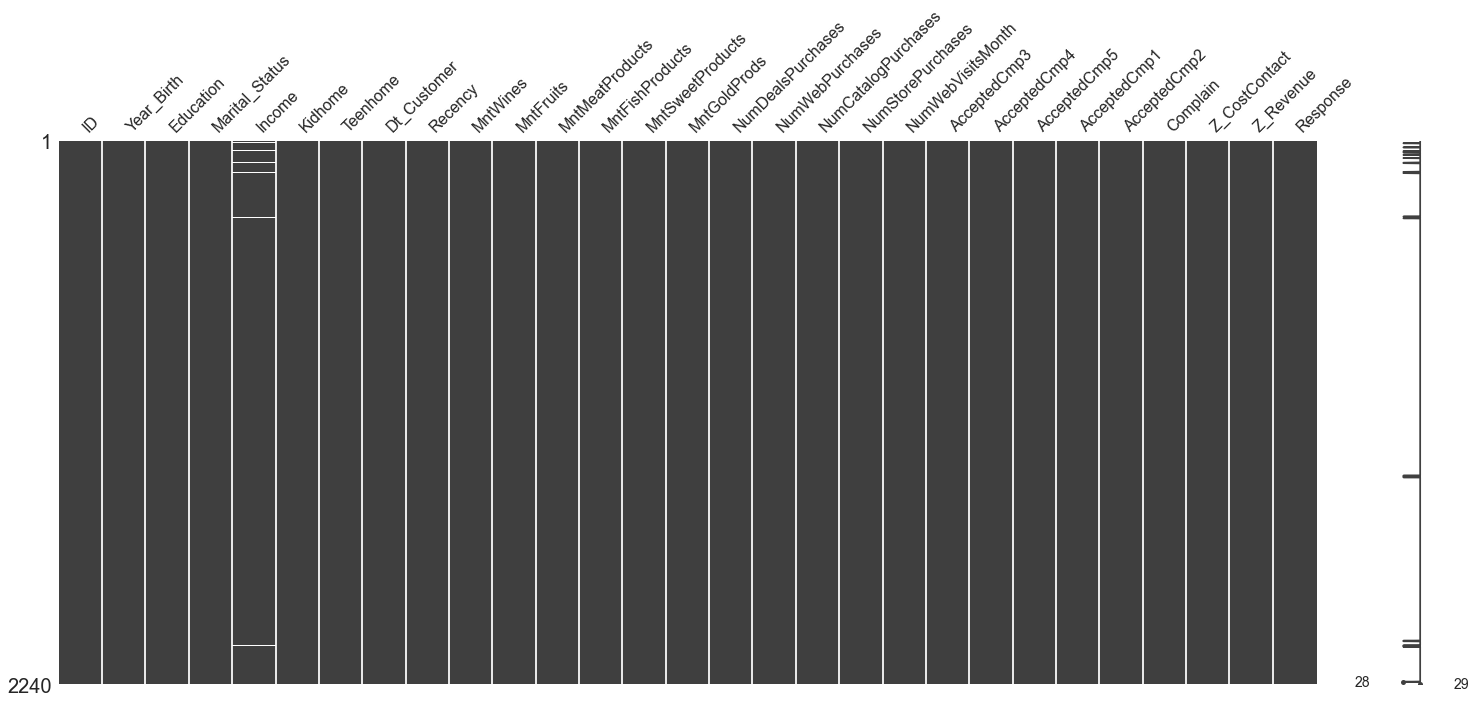

In [13]:
msno.matrix(data);

In [14]:
#drop nan values
data = data.dropna()

In [15]:
#rechack is any nun value remain
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [16]:
#let's find if we have duplicate rows.
data.duplicated().sum()

0

In [17]:
#dtype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [18]:
#Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [19]:
print("The newest customer's enrolment date in the records:", max(data['Dt_Customer']))
print("The oldest customer's enrolment date in the records:", min(data['Dt_Customer']))

The newest customer's enrolment date in the records: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


In [20]:
#Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
data['Age'] = 2015 - data['Year_Birth']

In [21]:
#Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.
data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [22]:
#Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.
data['Living_With'] = data['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})

In [23]:
#Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
data['Children'] = data['Kidhome'] + data['Teenhome']

In [24]:
#To get further clarity of household, Creating feature indicating "Family_Size"
data['Family_Size'] = data['Living_With'].replace({'Alone': 1, 'Partner':2}) + data['Children']

In [25]:
#Create a feature "Is_Parent" to indicate parenthood status
data['Is_Parent'] = np.where(data.Children > 0, 1, 0)

In [26]:
#Segmenting education levels in three groups
data['Education'] = data['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

In [82]:
#Dropping some of the redundant features
to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
data = data.drop(to_drop, axis=1)

KeyError: "['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID'] not found in axis"

In [28]:
data.head(3)

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  Graduate  58138.0        0         0       58       635         88   
1  Graduate  46344.0        1         1       38        11          1   
2  Graduate  71613.0        0         0       26       426         49   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   

   AcceptedCmp2  Complain  Response  Age  Spent Living_With  Children  \
0             0         0         1   58   1617       Alone         0   
1             0         0         0   61     27       Alone         2   
2             0         0         0   50    776     Partner         0   

   Family_Size  Is_Parent  
0            1          0  
1            3          1  
2            2          0

# Data_Analysis_and_Visualization



In [29]:
data.shape

(2216, 29)

There are 2216 cutomers and 29 features in the dataset.

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntFishProducts      2216 non-null   int64  
 9   MntSweetProducts     2216 non-null   int64  
 10  MntGoldProds         2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [31]:
data.describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2216.000000      2216.000000      2216.000000       2216.000000   
mean     26.356047       166.995939        37.637635         27.028881   
std      39.793917       224.283273        54.752082         41.072046   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       232.250000        50.000000         33.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count   2216.000000        2216.000000      2216.000000          2216.000000   
mean      43.965253           2.323556         4.085289             2.671029   
std       51.815414           1.923716         2.740951             2.926734   
min        0.000000           0.000000         0.000000             0.000000   
25%        9.000000           1.000000         2.000000             0.000000   
50%       24.500000           2.000000         4.000000             2.000000   
75%       56.000000           3.000000         6.000000             4.000000   
max      321.000000          15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2216.000000        2216.000000   2216.000000   2216.000000   
mean            5.800993           5.319043      0.073556      0.074007   
std             3.250785           2.425359      0.261106      0.261842   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count   2216.000000   2216.000000   2216.000000  2216.000000  2216.000000   
mean       0.073105      0.064079      0.013538     0.009477     0.150271   
std        0.260367      0.244950      0.115588     0.096907     0.357417   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     46.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      19.000000     5.000000     0.000000     1.000000     0.000000  
25%      38.000000    69.000000     0.000000     2.000000     0.000000  
50%      45.000000   396.500000     1.000000     3.000000     1.000000  
75%      56.000000  1048.000000     1.000000     3.000000   

In [32]:
data.describe(include=object).T

count unique       top  freq
Education    2216      3  Graduate  1116
Living_With  2216      2   Partner  1430

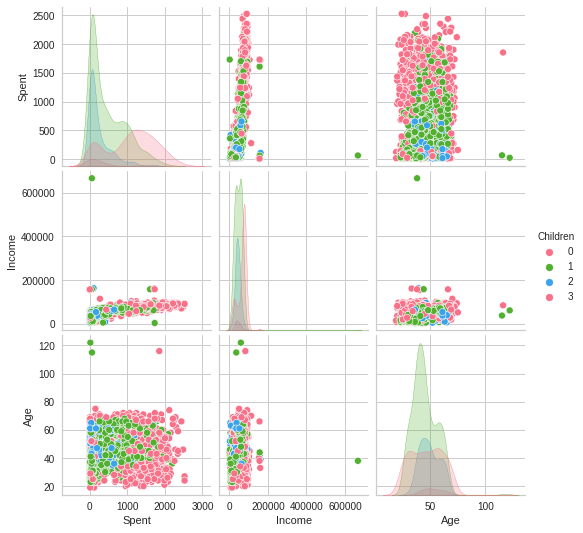

In [49]:
sns.pairplot(data , vars=['Spent','Income','Age'] , hue='Children', palette='husl');

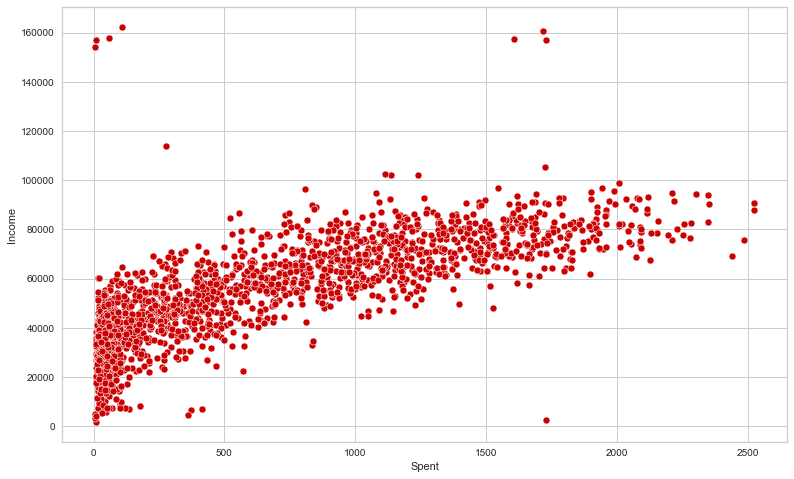

In [33]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data[data['Income']<600000]['Spent'], y=data[data['Income']<600000]['Income'], color='#cc0000');

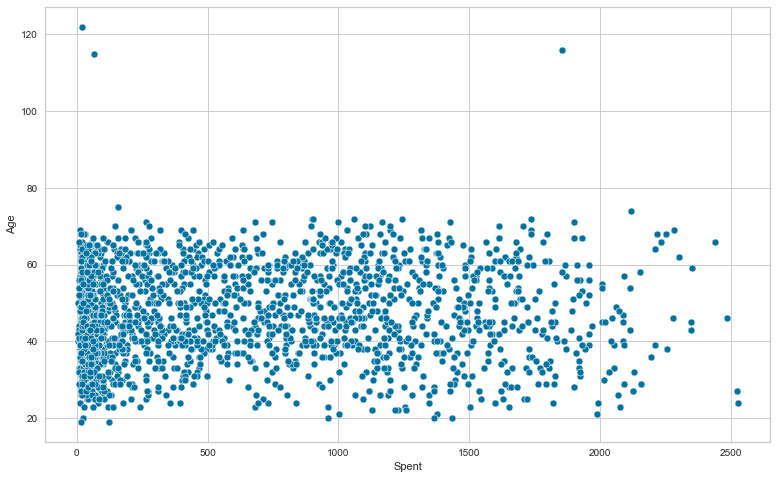

In [34]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data['Spent'], y=data['Age']);

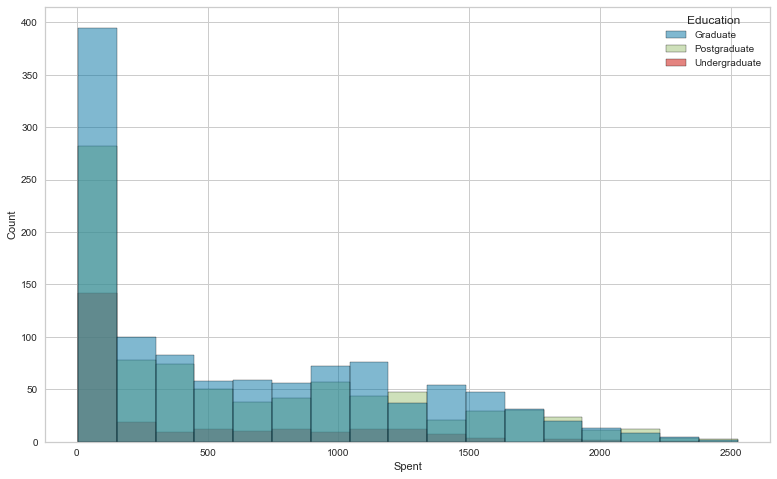

In [35]:
plt.figure(figsize=(13,8))
sns.histplot(x=data['Spent'], hue=data['Education']);

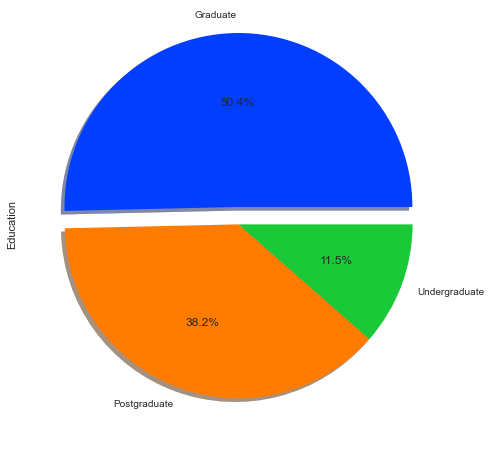

In [36]:
data['Education'].value_counts().plot.pie(explode=[0.1,0,0], autopct='%1.1f%%', shadow=True, figsize=(8,8), colors=sns.color_palette('bright'));

# 'Outlier_Detection'>



The presence of outliers in a classification or regression dataset can result in a poor fit and lower predictive modeling performance, therefore we should see there are ouliers in the data.

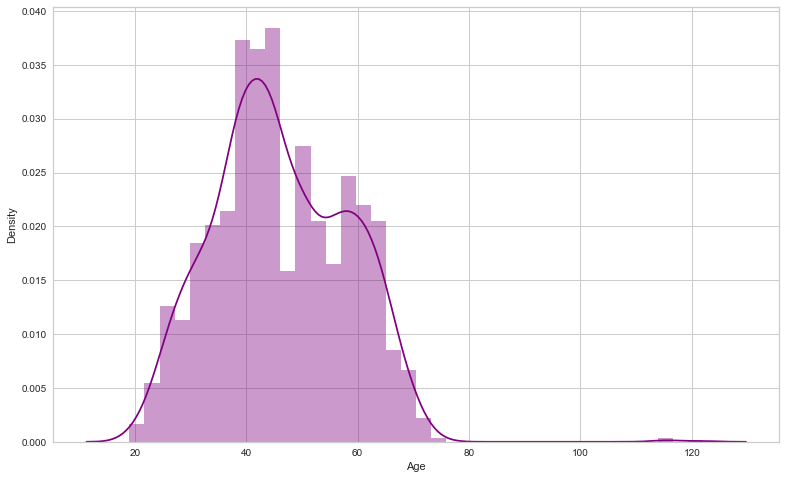

In [37]:
plt.figure(figsize=(13,8))
sns.distplot(data.Age, color='purple');

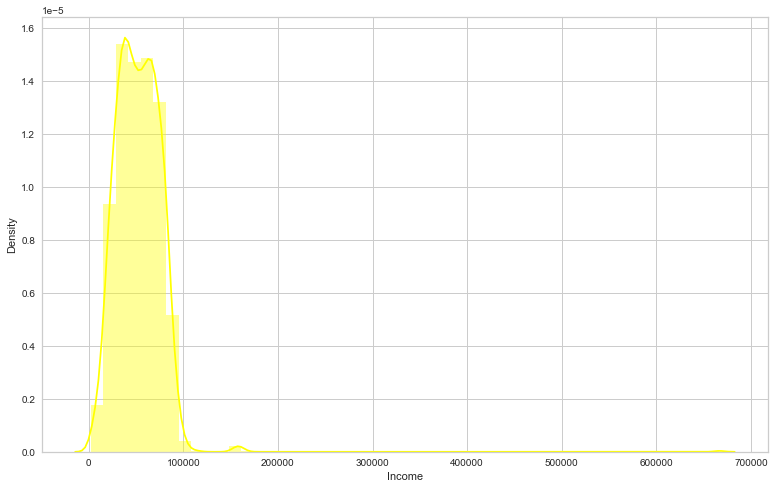

In [38]:
plt.figure(figsize=(13,8))
sns.distplot(data.Income, color='Yellow');

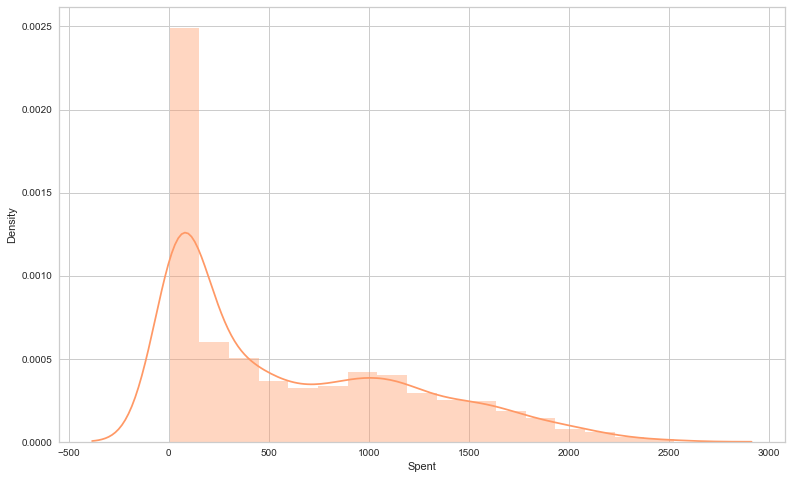

In [39]:
plt.figure(figsize=(13,8))
sns.distplot(data.Spent, color='#ff9966');

Another way of visualising outliers is using boxplots and whiskers,
which provides the quantiles (box) and inter-quantile range (whiskers),
with the outliers sitting outside the error bars (whiskers).

All the dots in the plot below are outliers according to the quantiles + 1.5 IQR rule

In [40]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=data['Age'], notched=True, name='Age', marker_color = '#6699ff', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 2)

fig.add_trace(go.Box(y=data['Income'], notched=True, name='Income', marker_color = '#ff0066', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 1)

fig.add_trace(go.Box(y=data['Spent'], notched=True, name='Spent', marker_color = 'lightseagreen', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 3)

fig.update_layout(title_text='<b>Box Plots for Numerical Variables<b>')

fig.show()

<p align="center">
  <img width="600" height="300" src="https://miro.medium.com/proxy/1*ghJQrcLZXGWxDPzppLWULA.png">
</p>

In [41]:
data.head(1)

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  Graduate  58138.0        0         0       58       635         88   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   

   AcceptedCmp2  Complain  Response  Age  Spent Living_With  Children  \
0             0         0         1   58   1617       Alone         0   

   Family_Size  Is_Parent  
0            1          0

In [42]:
numerical = ['Income', 'Recency', 'Age', 'Spent']

In [43]:
def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(data[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = data[i][(data[i] > ul) | (data[i] < ll)]
    print(f'*** {i} outlier points***', '\n', outliers, '\n')

In [44]:
detect_outliers(numerical)

*** Income outlier points*** 
 164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64 

*** Recency outlier points*** 
 Series([], Name: Recency, dtype: int64) 

*** Age outlier points*** 
 192    115
239    122
339    116
Name: Age, dtype: int64 

*** Spent outlier points*** 
 1179    2525
1492    2524
1572    2525
Name: Spent, dtype: int64 



We will delete some of the outlier points.

In [45]:
data = data[(data['Age']<100)]
data = data[(data['Income']<600000)]

In [46]:
data.shape

(2212, 29)

# 'Check_for_Rare_Categories'



Some categories may appear a lot in the dataset, whereas some other categories appear only in a few number of observations. 

* Rare values in categorical variables tend to cause over-fitting, particularly in tree based methods.
* Rare labels may be present in training set, but not in test set, therefore causing over-fitting to the train set.
* Rare labels may appear in the test set, and not in the train set. Thus, the machine learning model will not know how to evaluate it.

In [47]:
categorical = [var for var in data.columns if data[var].dtype=='O']

In [48]:
# check the number of different labels
for var in categorical:
    print(data[var].value_counts() / np.float(len(data)))
    print()
    print()

Graduate         0.504069
Postgraduate     0.382007
Undergraduate    0.113924
Name: Education, dtype: float64


Partner    0.64557
Alone      0.35443
Name: Living_With, dtype: float64




As shown above, there is no rare category in the categorical variables.

# 'Categorical_Variables_Encoding'


In [49]:
categorical

['Education', 'Living_With']

In [50]:
data['Living_With'].unique()

array(['Alone', 'Partner'], dtype=object)

Since the education is a ordinal variable, we will encode it with ordinal numbers.

In [51]:
data['Education'] = data['Education'].map({'Undergraduate':0,'Graduate':1, 'Postgraduate':2})

In [52]:
data['Living_With'] = data['Living_With'].map({'Alone':0,'Partner':1})

In [53]:
data.dtypes

Education                int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
Spent                    int64
Living_With              int64
Children                 int64
Family_Size              int64
Is_Parent                int32
dtype: object

In [54]:
data.head(3)

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0          1  58138.0        0         0       58       635         88   
1          1  46344.0        1         1       38        11          1   
2          1  71613.0        0         0       26       426         49   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   

   AcceptedCmp2  Complain  Response  Age  Spent  Living_With  Children  \
0             0         0         1   58   1617            0         0   
1             0         0         0   61     27            0         2   
2             0         0         0   50    776            1         0   

   Family_Size  Is_Parent  
0            1          0  
1            3          1  
2            2          0

<AxesSubplot:>

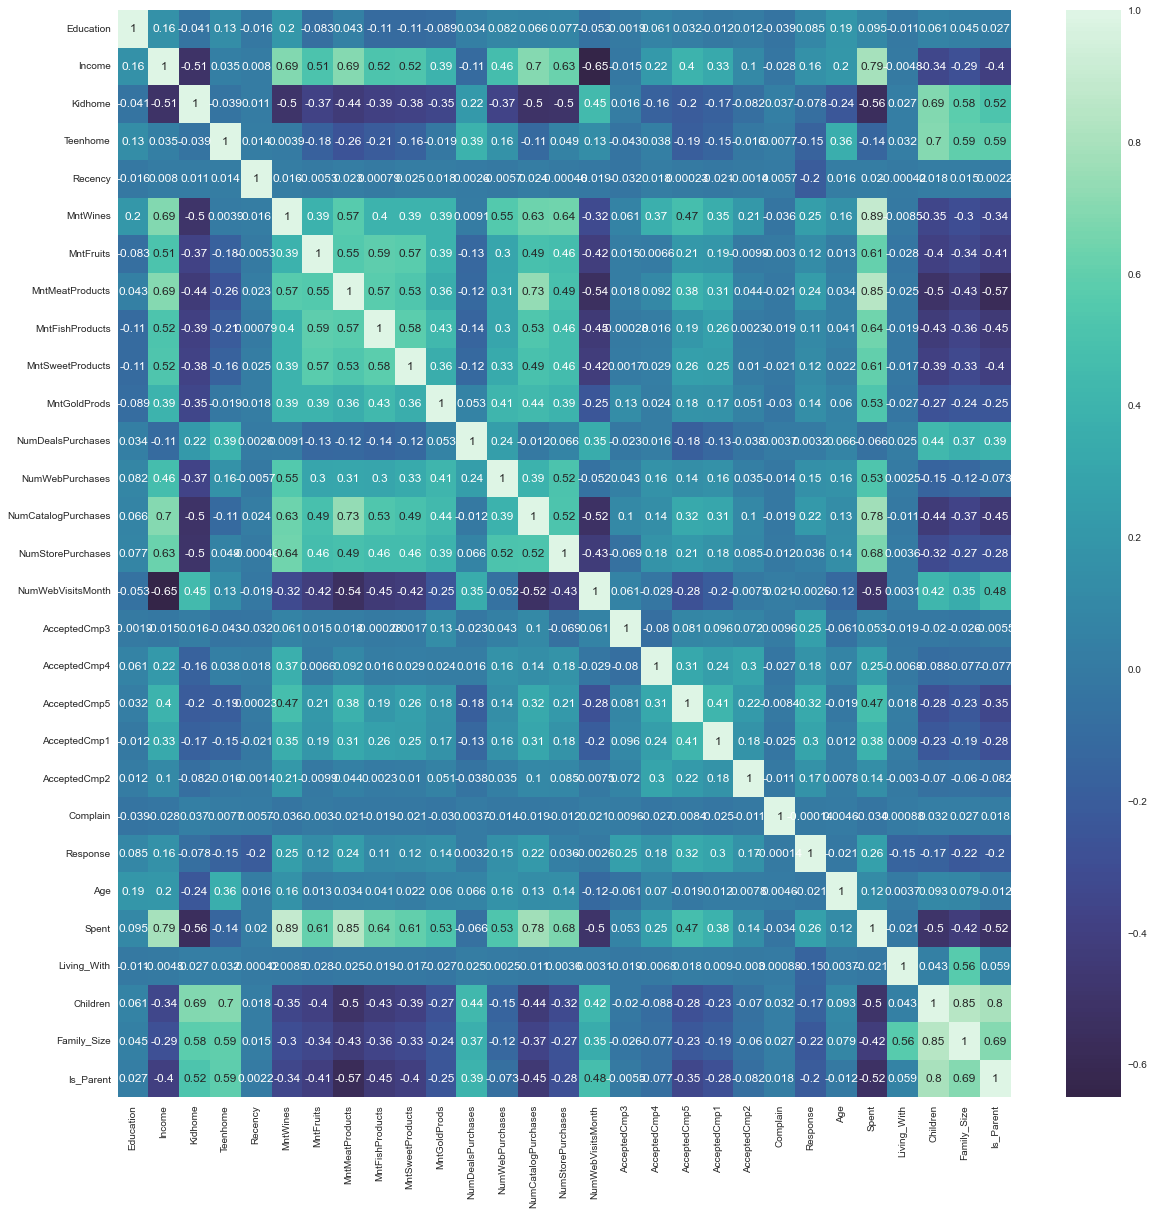

In [55]:
corrmat = data.corr()

plt.figure(figsize=(20,20))  
sns.heatmap(corrmat, annot = True, cmap = 'mako', center = 0)

# 'Feature_Scaling'>



In this section, numerical features are scaled.

StandardScaler = $\frac{x-\mu}{s}$

In [56]:
data_old = data.copy()

In [57]:
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
data = data.drop(cols_del, axis=1)

In [58]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [59]:
data.head(3)

Education    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  -0.411675  0.287105 -0.822754 -0.929699  0.310353  0.977660   1.552041   
1  -0.411675 -0.260882  1.040021  0.908097 -0.380813 -0.872618  -0.637461   
2  -0.411675  0.913196 -0.822754 -0.929699 -0.795514  0.357935   0.570540   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0         1.690293         2.453472          1.483713      0.852576   
1        -0.718230        -0.651004         -0.634019     -0.733642   
2        -0.178542         1.339513         -0.147184     -0.037254   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0           0.351030         1.426865             2.503607          -0.555814   
1          -0.168701        -1.126420            -0.571340          -1.171160   
2          -0.688432         1.426865            -0.229679           1.290224   

   NumWebVisitsMonth       Age     Spent  Living_With  Children  Family_Size  \
0           0.692181  1.018352  1.676245    -1.349603 -1.264598    -1.758359   
1          -0.132545  1.274785 -0.963297    -1.349603  1.404572     0.449070   
2          -0.544908  0.334530  0.280110     0.740959 -1.264598    -0.654644   

   Is_Parent  
0  -1.581139  
1   0.632456  
2  -1.581139

# 'Dimensionality_Reduction'>



In [60]:
p = PCA(n_components=3)
p.fit(data)

PCA(n_components=3)

In [61]:
W = p.components_.T
W

array([[ 1.13472957e-02,  1.40732674e-01, -5.06940068e-01],
       [ 2.79487090e-01,  1.78224350e-01, -7.52017692e-02],
       [-2.46222808e-01,  5.20858802e-03,  2.82860681e-01],
       [-9.87087700e-02,  4.62125224e-01, -1.51429687e-01],
       [ 3.52658733e-03,  1.62560280e-02,  3.57712954e-02],
       [ 2.55717033e-01,  2.09387399e-01, -1.16743211e-01],
       [ 2.38397929e-01,  1.10396643e-02,  2.53428397e-01],
       [ 2.85462116e-01,  9.92225765e-03,  7.69224660e-02],
       [ 2.48709864e-01,  2.54720133e-04,  2.53050099e-01],
       [ 2.37301698e-01,  2.16461560e-02,  2.58569047e-01],
       [ 1.88380300e-01,  1.23119130e-01,  2.00860728e-01],
       [-7.82600375e-02,  3.48724544e-01,  1.51973258e-01],
       [ 1.67559802e-01,  2.96763902e-01,  2.32955441e-02],
       [ 2.77349118e-01,  1.05985985e-01,  1.67469105e-02],
       [ 2.41542852e-01,  2.05435331e-01, -8.85218092e-03],
       [-2.25949467e-01,  4.61192996e-02,  9.13686794e-02],
       [ 3.84646647e-02,  2.34774875e-01

In [62]:
pd.DataFrame(W, index=data.columns, columns=['W1','W2','W3'])

W1        W2        W3
Education            0.011347  0.140733 -0.506940
Income               0.279487  0.178224 -0.075202
Kidhome             -0.246223  0.005209  0.282861
Teenhome            -0.098709  0.462125 -0.151430
Recency              0.003527  0.016256  0.035771
MntWines             0.255717  0.209387 -0.116743
MntFruits            0.238398  0.011040  0.253428
MntMeatProducts      0.285462  0.009922  0.076922
MntFishProducts      0.248710  0.000255  0.253050
MntSweetProducts     0.237302  0.021646  0.258569
MntGoldProds         0.188380  0.123119  0.200861
NumDealsPurchases   -0.078260  0.348725  0.151973
NumWebPurchases      0.167560  0.296764  0.023296
NumCatalogPurchases  0.277349  0.105986  0.016747
NumStorePurchases    0.241543  0.205435 -0.008852
NumWebVisitsMonth   -0.225949  0.046119  0.091369
Age                  0.038465  0.234775 -0.428528
Spent                0.320099  0.133714  0.037863
Living_With         -0.027576  0.125509  0.300205
Children            -0.248087  0.339321  0.092689
Family_Size         -0.219730  0.346884  0.235148
Is_Parent           -0.242808  0.292282  0.081866

In [63]:
p.explained_variance_

array([8.27465625, 2.92091443, 1.43058565])

In [64]:
p.explained_variance_ratio_

array([0.3759507 , 0.13270882, 0.06499722])

In [65]:
pd.DataFrame(p.explained_variance_ratio_, index=range(1,4), columns=['Explained Variability'])

Explained Variability
1               0.375951
2               0.132709
3               0.064997

In [66]:
p.explained_variance_ratio_.cumsum()

array([0.3759507 , 0.50865952, 0.57365674])

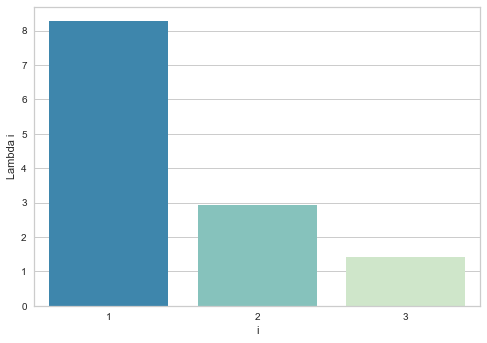

In [67]:
sns.barplot(x = list(range(1,4)), y = p.explained_variance_, palette = 'GnBu_r')
plt.xlabel('i')
plt.ylabel('Lambda i');

In [68]:
data_PCA = pd.DataFrame(p.transform(data), columns=(['col1', 'col2', 'col3']))

In [69]:
data_PCA.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0  9.375663e-17  2.876570 -5.915030 -2.548037 -0.784932  2.418555   
col2  2212.0  2.218438e-17  1.709068 -4.398450 -1.343405 -0.133256  1.243008   
col3  2212.0 -1.816911e-17  1.196077 -3.542667 -0.864202 -0.017330  0.822924   

           max  
col1  7.441146  
col2  6.248218  
col3  5.033937

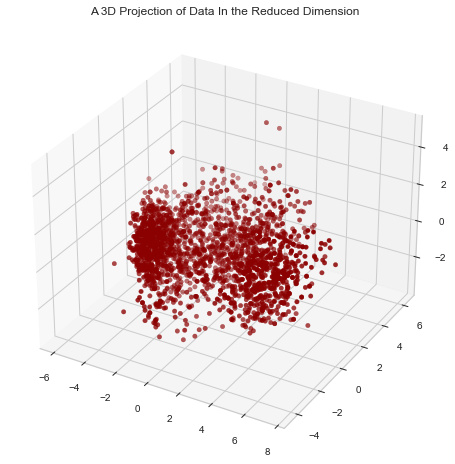

In [70]:
x = data_PCA['col1']
y = data_PCA['col2']
z = data_PCA['col3']

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='darkred', marker='o')
ax.set_title('A 3D Projection of Data In the Reduced Dimension')
plt.show()

# 'Clustering'



Elbow Method to determine the number of clusters to be formed.

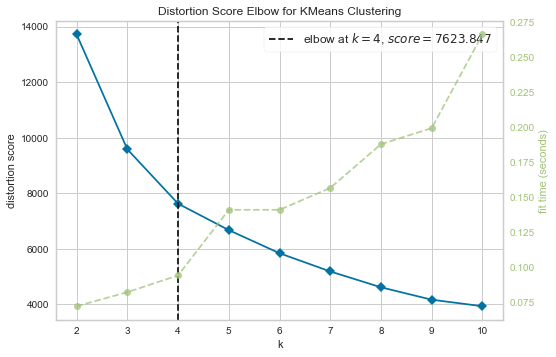

In [71]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_PCA)
Elbow_M.show();

In [72]:
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(data_PCA)
data_PCA['Clusters'] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data['Clusters'] = yhat_AC
data_old['Clusters'] = yhat_AC

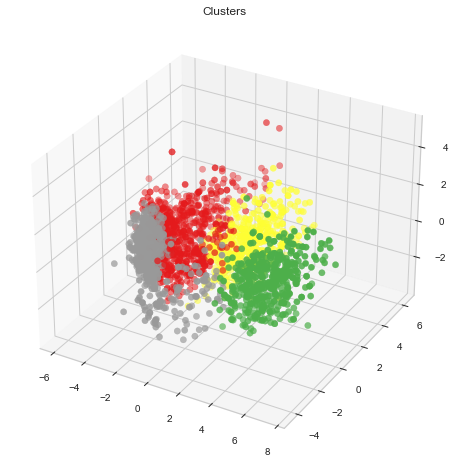

In [73]:
fig = plt.figure(figsize=(13,8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, s=40, c=data_PCA['Clusters'], marker='o', cmap='Set1_r')
ax.set_title('Clusters')
plt.show()

# 'Clusters_Analysis_and_Customers_Profiling'



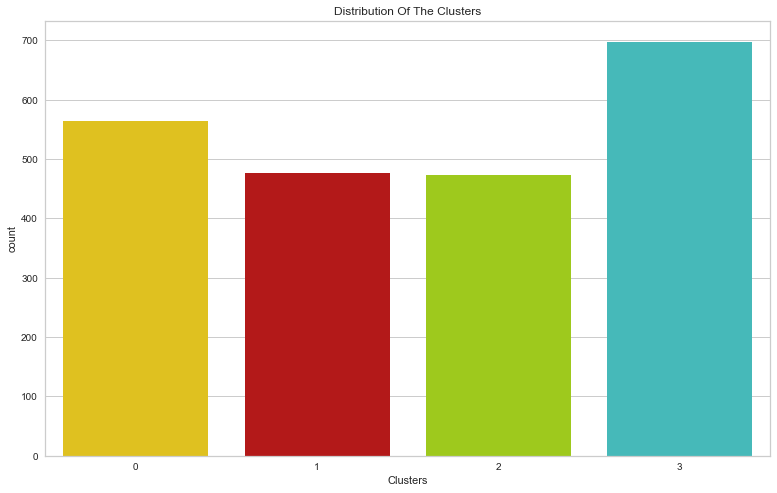

In [74]:
pal = ['gold','#cc0000', '#ace600','#33cccc']
plt.figure(figsize=(13,8))
pl = sns.countplot(x=data['Clusters'], palette= pal)
pl.set_title('Distribution Of The Clusters')
plt.show()

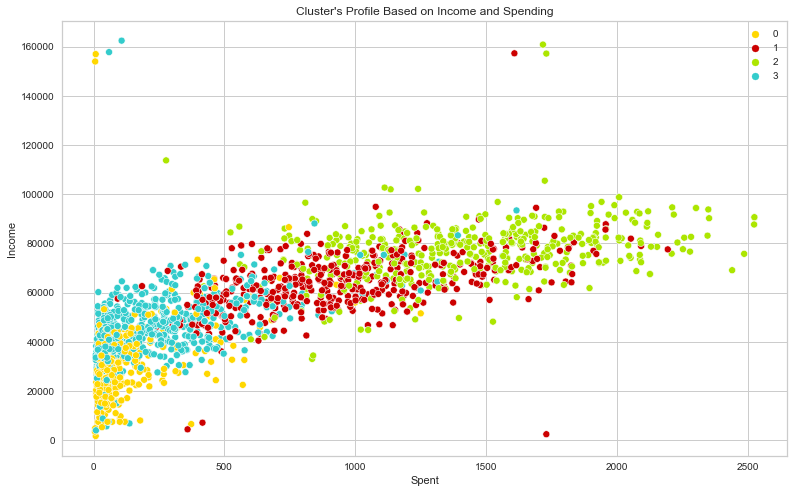

In [75]:
plt.figure(figsize=(13,8))
pl = sns.scatterplot(data=data_old, x=data_old['Spent'], y=data_old['Income'], hue=data_old['Clusters'], palette= pal)
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend();

Income vs spending plot shows the clusters pattern

* group 1: high spending & average income
* group 0: low spending & low income
* group 3: low spending & average income
* group 2: high spending & high income

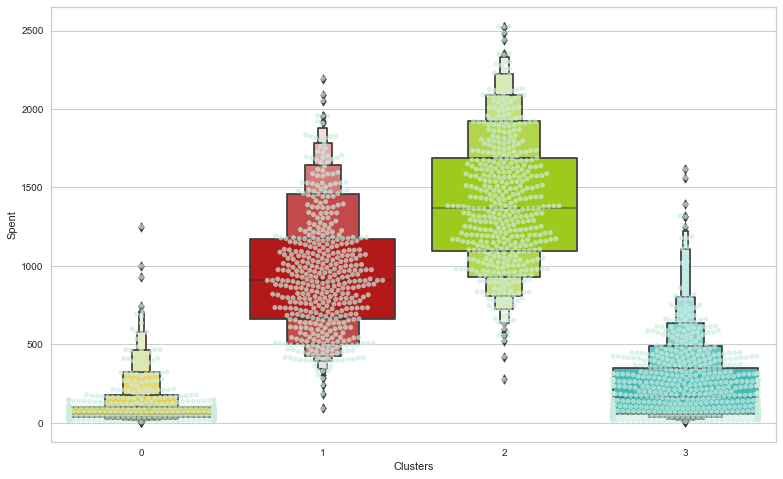

In [76]:
plt.figure(figsize=(13,8))
pl = sns.swarmplot(x=data_old['Clusters'], y=data_old['Spent'], color="#CBEDDD", alpha=0.7)
pl = sns.boxenplot(x=data_old['Clusters'], y=data_old['Spent'], palette=pal)
plt.show();

From the above plot, it can be clearly seen that cluster 2 is our biggest set of customers closely followed by cluster 1. We can explore what each cluster is spending on for the targeted marketing strategies.

Plotting count of total campaign accepted.

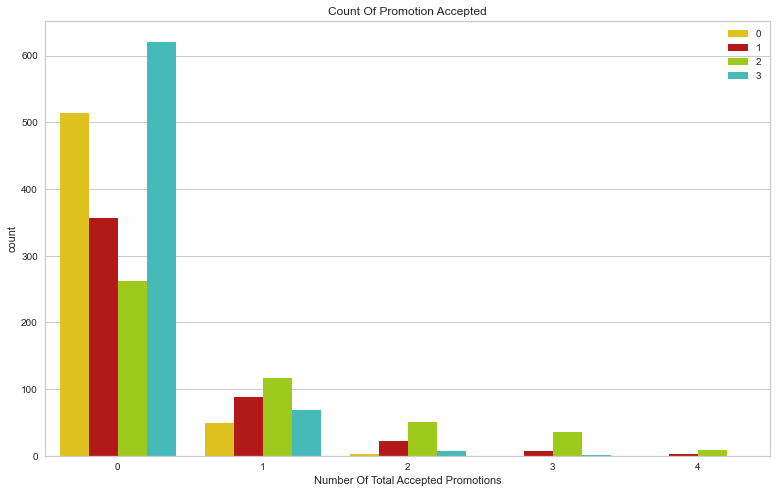

In [77]:
data_old['Total_Promos'] = data_old['AcceptedCmp1']+ data_old['AcceptedCmp2']+ data_old['AcceptedCmp3']+ data_old['AcceptedCmp4']+ data_old['AcceptedCmp5']

plt.figure(figsize=(13,8))
pl = sns.countplot(x=data_old['Total_Promos'], hue=data_old['Clusters'], palette= pal)
pl.set_title('Count Of Promotion Accepted')
pl.set_xlabel('Number Of Total Accepted Promotions')
plt.legend(loc='upper right')
plt.show();

There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

Plotting the number of deals purchased

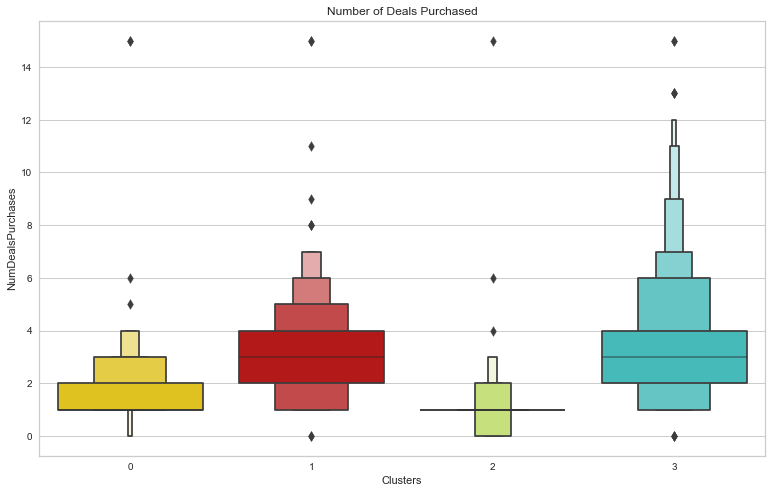

In [78]:
plt.figure(figsize=(13,8))
pl=sns.boxenplot(y=data_old['NumDealsPurchases'],x=data_old['Clusters'], palette= pal)
pl.set_title('Number of Deals Purchased');

Unlike campaigns, the deals offered did well. It has best outcome with cluster 1 and cluster 3. However, our star customers cluster 2 are not much into the deals. Nothing seems to attract cluster 0 overwhelmingly

<Figure size 936x576 with 0 Axes>

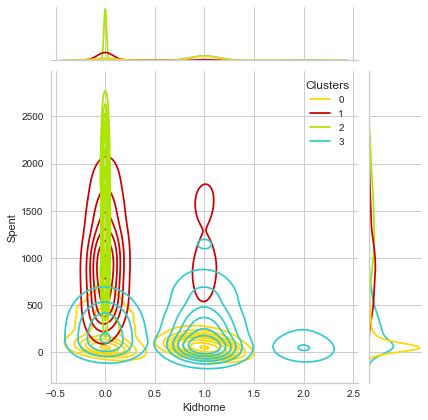

<Figure size 936x576 with 0 Axes>

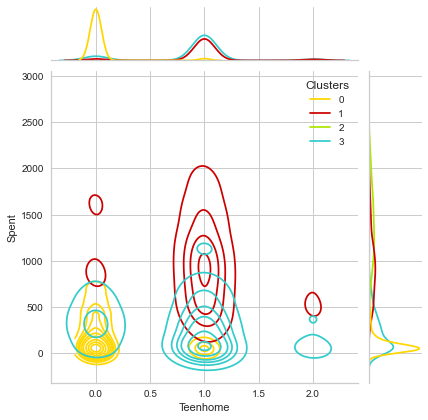

<Figure size 936x576 with 0 Axes>

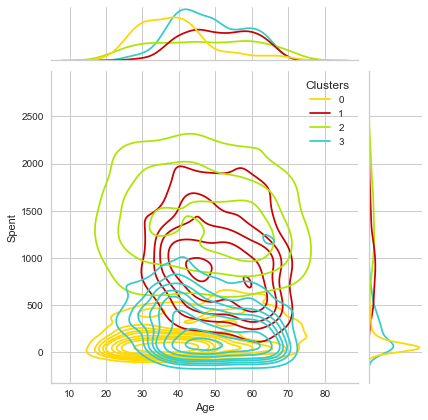

<Figure size 936x576 with 0 Axes>

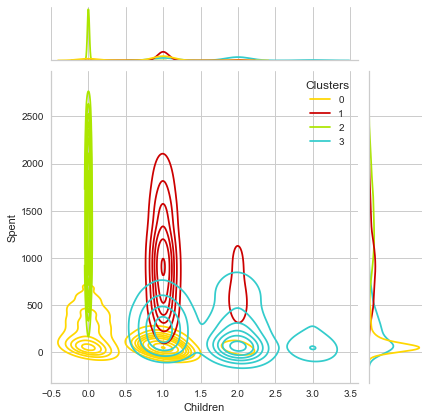

<Figure size 936x576 with 0 Axes>

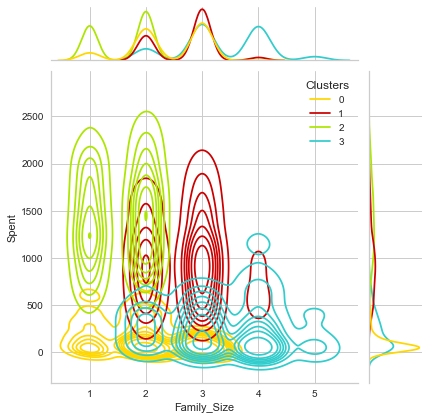

<Figure size 936x576 with 0 Axes>

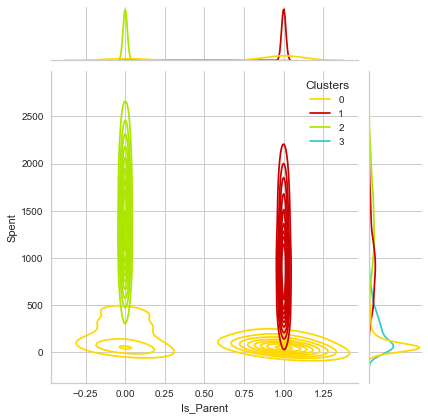

<Figure size 936x576 with 0 Axes>

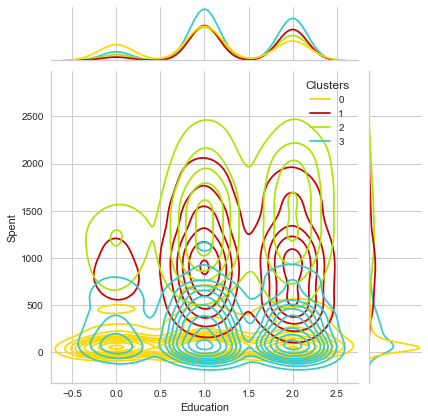

<Figure size 936x576 with 0 Axes>

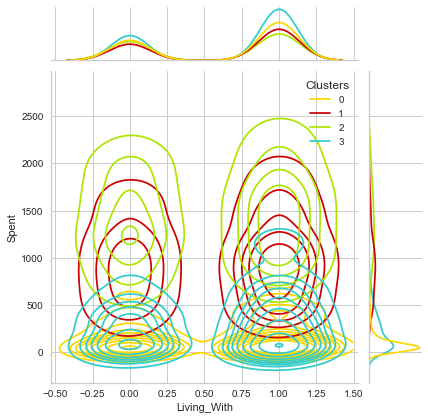

In [79]:
Personal = ['Kidhome', 'Teenhome', 'Age', 'Children', 'Family_Size', 'Is_Parent', 'Education', 'Living_With']

for i in Personal:
    plt.figure(figsize=(13,8))
    sns.jointplot(x=data_old[i], y=data_old['Spent'], hue=data_old['Clusters'], kind='kde', palette=pal);

**About Cluster 0:**
* The majority of these people are parents
* At max have 3 members in the family
* They majorly have one kid and typically not tennagers
* Relatively younger

**About Cluster 1:**
* Definitely a parent
* At max have 4 members in the family and at least 2
* Most have a teeanger in home
* Single parents are a subset of this group
* Relatively older

**About Cluster 2:**
* Definitely not a parent
* At max are only 2 members in the family.
* A slight majority of couples over single people
* Span all ages
* high income and high spending

**About Cluster 3:**
* Definitely a parent
* At max have 5 members in the family and at least 2
* Majority of them have a teenager at home
* Relatively older